In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='Nanum Gothic')

In [2]:
chunky = pd.read_csv('나이키 x 벤앤제리스 SB 덩크 로우 청키 덩키 | Nike | KREAM.csv')
scott = pd.read_csv('나이키 x 트래비스 스캇 SB 덩크 로우 | Nike | KREAM.csv')
strange = pd.read_csv('나이키 x 스트레인지러브 SB 덩크 로우 핑크 (레귤러 박스) | Nike | KREAM.csv')
sean = pd.read_csv('나이키 x 션 클리버 SB 덩크 로우 홀리데이 스페셜 | Nike | KREAM.csv')
dodgers = pd.read_csv('나이키 SB 덩크 로우 프로 프리미엄 딥 로얄 블루 | Nike | KREAM.csv')
chicago = pd.read_csv('나이키 SB 덩크 로우 프로 시카고 | Nike | KREAM.csv')
purple = pd.read_csv('나이키 SB 덩크 로우 프로 코트 퍼플 | Nike | KREAM.csv')

In [3]:
def prepare_data(df):
    df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')
    df['월별'] = df['거래일'].dt.to_period('M')
    df['거래가'] = df['거래가'].str.replace('원', '').str.replace(',', '').astype(int)
    return df

chunky = prepare_data(chunky)
scott = prepare_data(scott)
strange = prepare_data(strange)
sean = prepare_data(sean)
dodgers = prepare_data(dodgers)
chicago = prepare_data(chicago)
purple = prepare_data(purple)


In [4]:
chunky.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별
0,0,2024-09-26,270,1500000,False,2024-09
1,1,2024-09-06,255,1150000,False,2024-09
2,2,2024-08-19,260,1120000,False,2024-08
3,3,2024-08-14,265,1390000,False,2024-08
4,4,2024-08-02,260,1150000,False,2024-08


In [5]:
def length(df):
    len(df)

# 각 몇개의 데이터(행 개수)가 있는지 확인
len(chunky)


1020

In [6]:
len(scott)


2698

In [7]:
len(strange)


735

In [8]:
len(sean)


1932

In [9]:
len(dodgers)


3700

In [10]:
len(chicago)

8703

In [11]:
len(purple)

4465

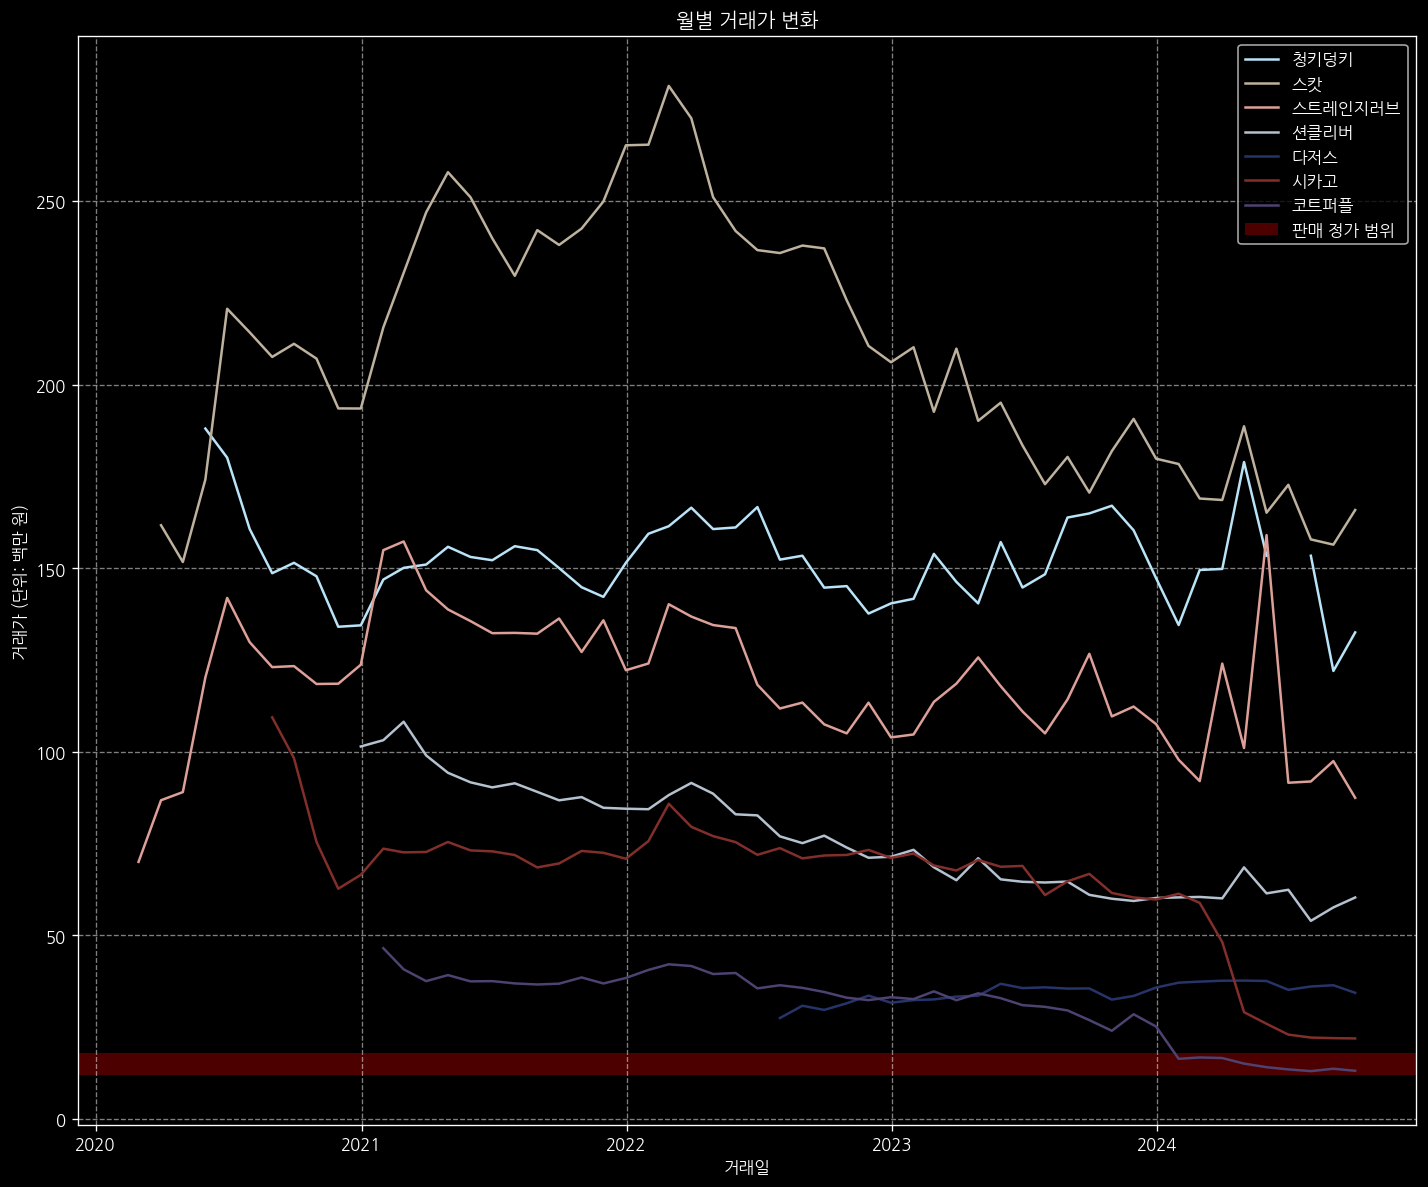

In [12]:
def plot(dataset, label, line_color, bar_color):
    monthly_data = dataset.groupby(pd.Grouper(key='거래일', freq='ME')).agg({'거래가': 'mean', '거래일': 'size'}).rename(columns={'거래일': '거래량'}).reset_index()

    ax.plot(monthly_data['거래일'], 
             monthly_data['거래가'] / 1e4, 
             color=line_color,
             label=label
             )
    
    # ax.bar(monthly_data['거래일'],
    #         monthly_data['거래량'],
    #         color=bar_color,
    #         alpha=0.5
    #         )

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12,10), dpi=120)

plot(chunky, '청키덩키', '#b9e3f7', '#b9e3f730')
plot(scott, '스캇', '#beb29e', '#beb29e30')
plot(strange, '스트레인지러브', '#dca098', '#dca09830')
plot(sean, '션클리버', '#b4c1cf', '#b4c1cf30')
plot(dodgers, '다저스', '#26346a', '#26346a30')
plot(chicago, '시카고', '#822f2b', '#822f2b30')
plot(purple, '코트퍼플', '#4e4271', '#4e427130')

ax.axhspan(11.9, 17.9, facecolor='red', alpha=0.3, label='판매 정가 범위')

plt.xlabel('거래일')
plt.ylabel('거래가 (단위: 백만 원)')
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
plt.title('월별 거래가 변화')
plt.legend()
plt.tight_layout()
plt.show()

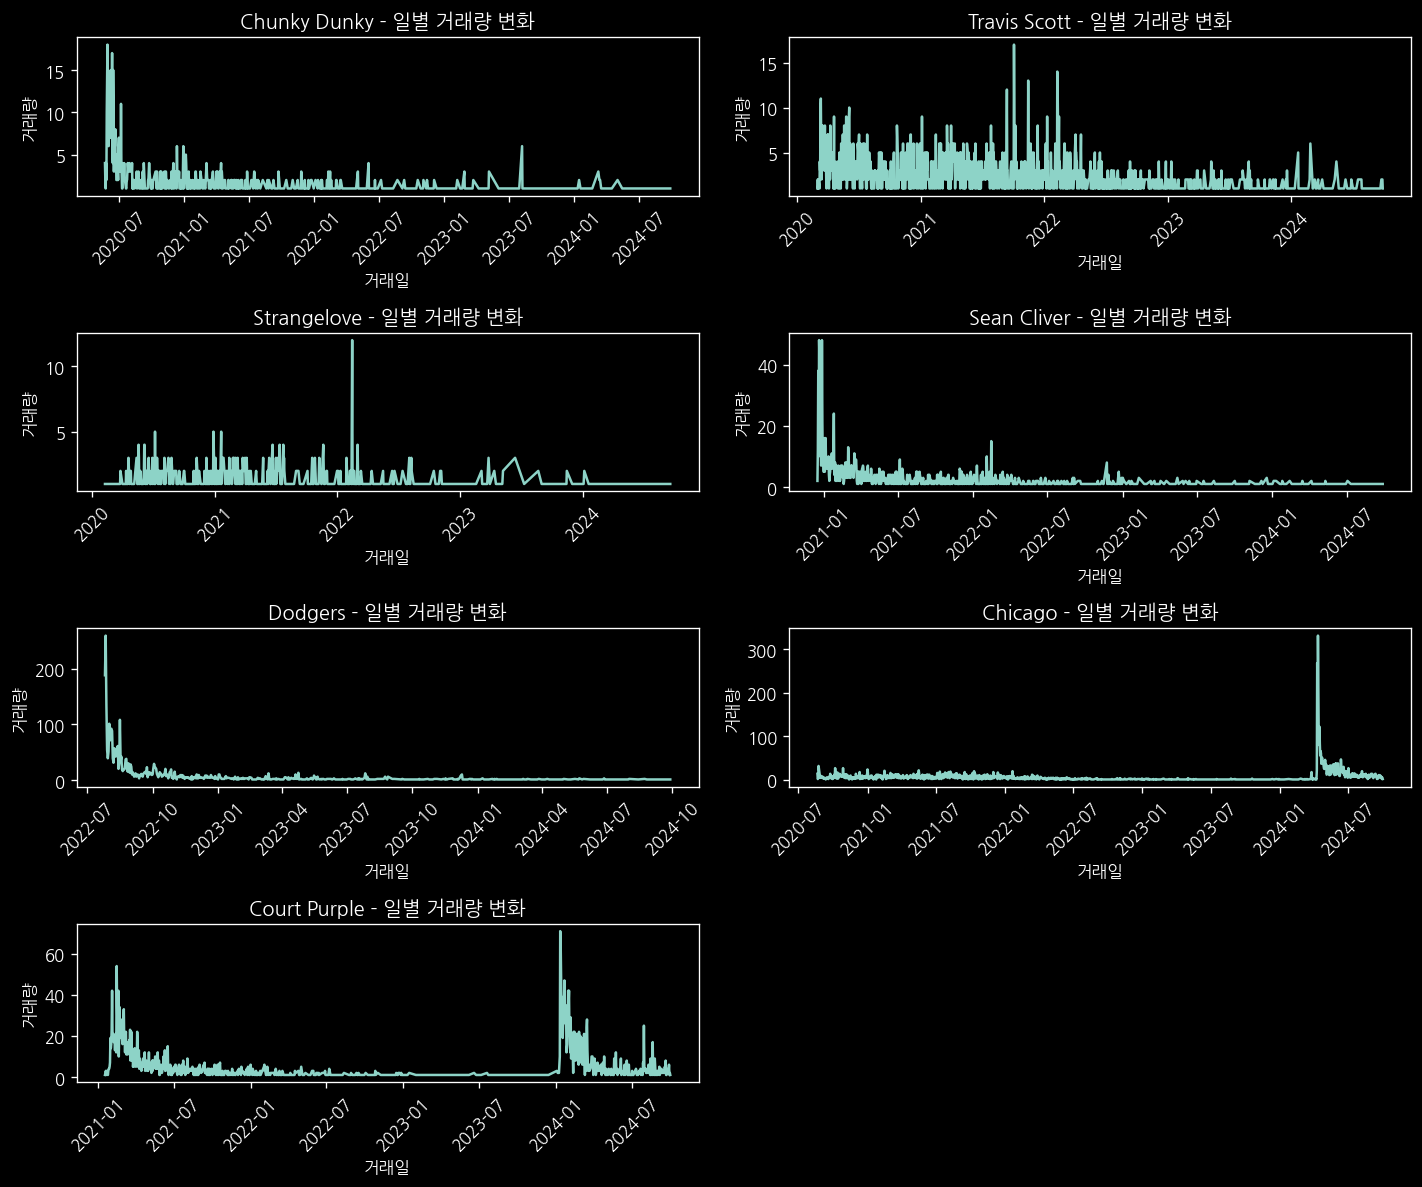

In [15]:
# Plot the daily transaction volume for each dataset separately
plt.figure(figsize=(12, 10), dpi=120)

datasets = [
    (chunky, 'Chunky Dunky'),
    (scott, 'Travis Scott'),
    (strange, 'Strangelove'),
    (sean, 'Sean Cliver'),
    (dodgers, 'Dodgers'),
    (chicago, 'Chicago'),
    (purple, 'Court Purple')
]

for i, (df, name) in enumerate(datasets, 1):
    daily_volume = df.groupby('거래일').size().reset_index(name='거래량')
    plt.subplot(4, 2, i)  # 4x2 grid for subplots
    sns.lineplot(data=daily_volume, x='거래일', y='거래량')
    plt.title(f'{name} - 일별 거래량 변화')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

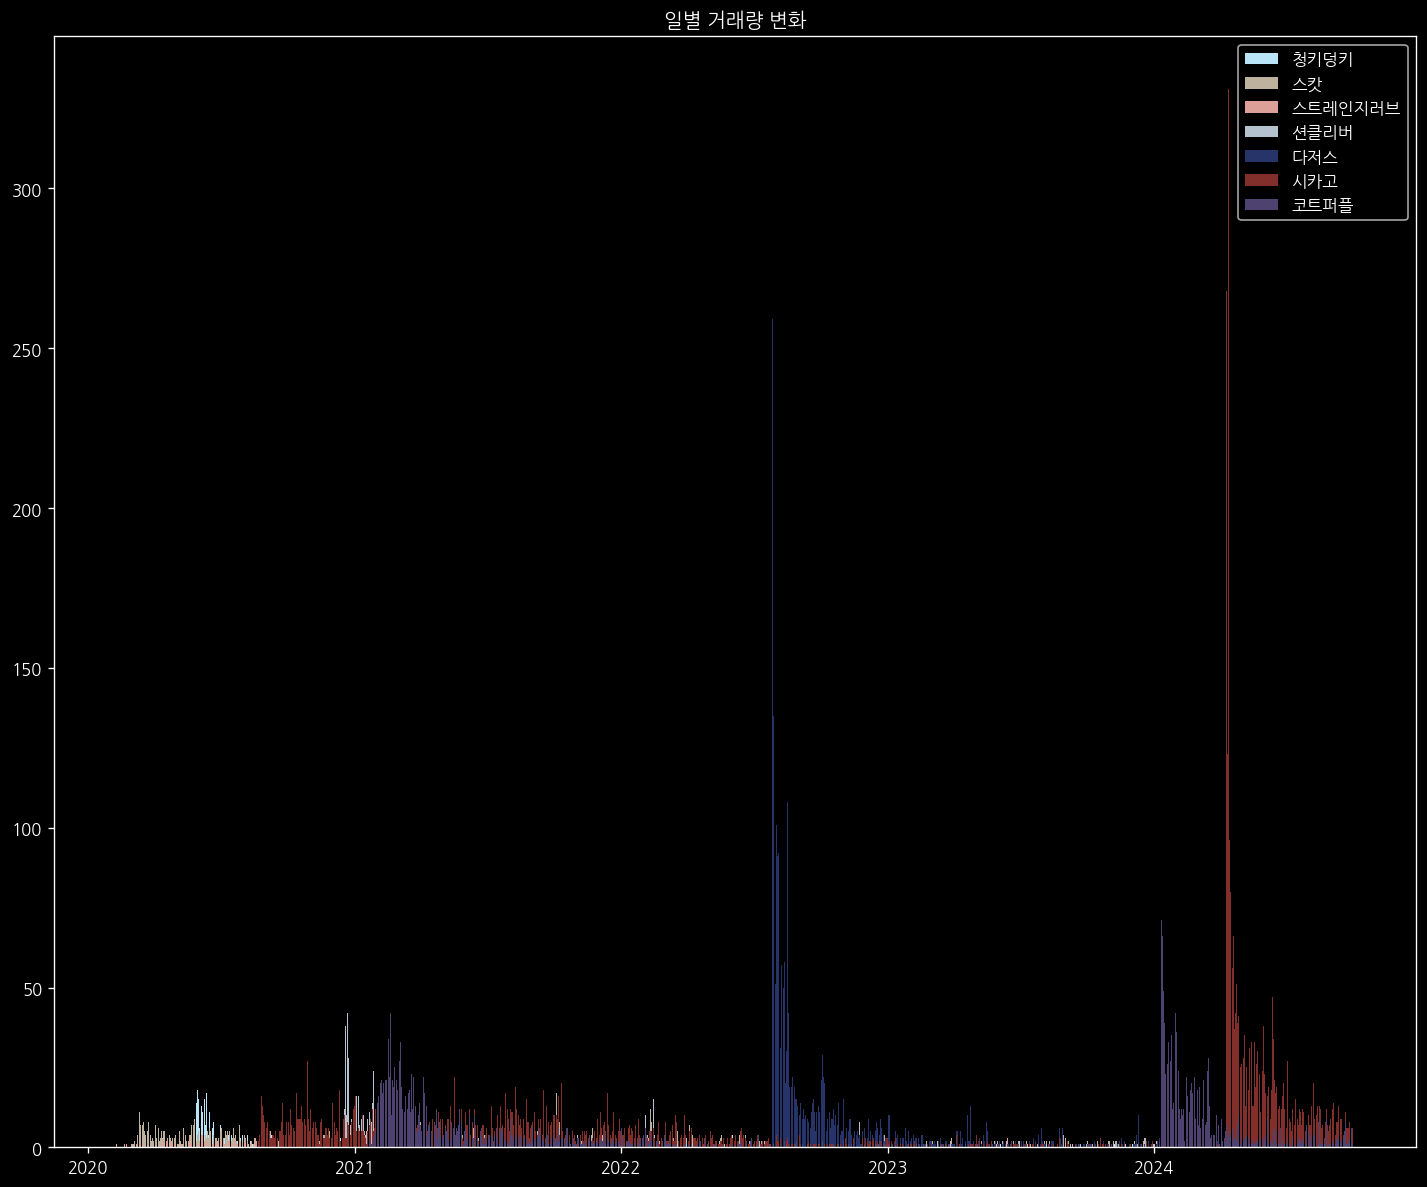

In [13]:
def barplot(dataset, label, color):
    daily_volume = dataset.groupby('거래일').size().reset_index(name='거래량')
    plt.bar(daily_volume['거래일'], daily_volume['거래량'], color=color, alpha=1, label=label)

plt.style.use('dark_background')
plt.figure(figsize=(12,10), dpi=120)

barplot(chunky, '청키덩키', '#b9e3f7')
barplot(scott, '스캇', '#beb29e')
barplot(strange, '스트레인지러브', '#dca098')
barplot(sean, '션클리버', '#b4c1cf')
barplot(dodgers, '다저스', '#26346a')
barplot(chicago, '시카고', '#822f2b')
barplot(purple, '코트퍼플', '#4e4271')

plt.legend()
plt.title('일별 거래량 변화')
plt.tight_layout()
plt.show()

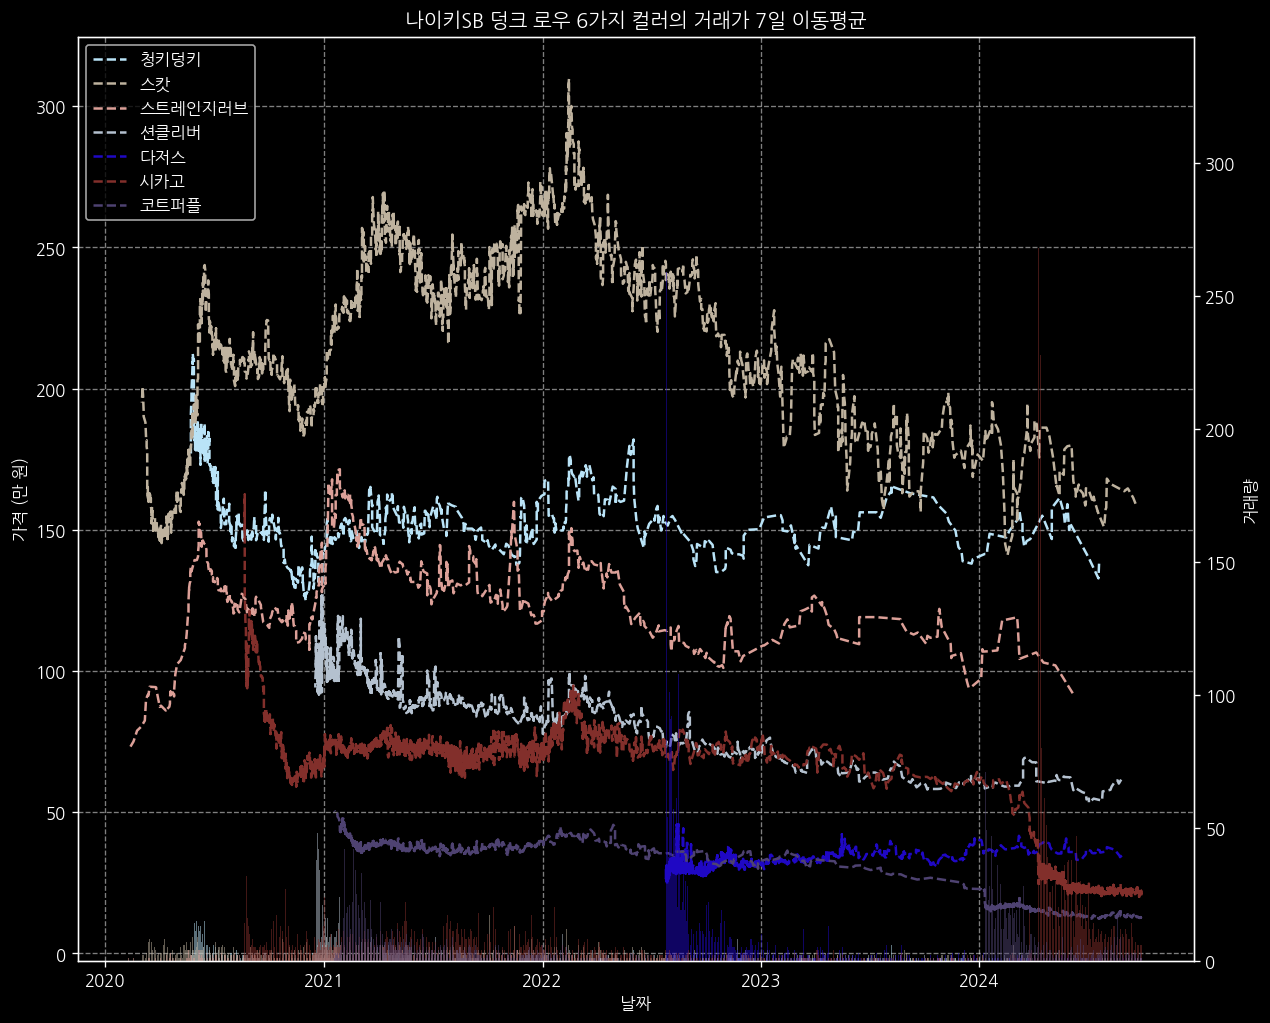

<Figure size 768x576 with 0 Axes>

In [14]:
# Define a function to plot stock-like data with transaction volume on a secondary axis
def plot_stock_style_with_volume(dataset, label, line_color, bar_color, ax1, ax2):
    dataset['거래일'] = pd.to_datetime(dataset['거래일'])
    
    # Compute moving average (7-day moving average as an example)
    dataset['7일 이동평균'] = dataset['거래가'].rolling(window=7).mean()

    # Plot transaction price (closing price) on the primary y-axis
    ax1.plot(dataset['거래일'], dataset['7일 이동평균'] / 1e4, label=label, linestyle='--', color=line_color)
    
    # Bar plot for transaction volume on secondary y-axis
    volume_data = dataset.groupby('거래일').size().reset_index(name='거래량')
    ax2.bar(volume_data['거래일'], volume_data['거래량'], alpha=0.5, color=bar_color)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 10), dpi=120)
ax2 = ax1.twinx()  # Create secondary axis for transaction volume

# Plot for each dataset
plot_stock_style_with_volume(chunky, '청키덩키', '#b9e3f7', '#b9e3f733', ax1, ax2)
plot_stock_style_with_volume(scott, '스캇', '#beb29e', '#beb29e33', ax1, ax2)
plot_stock_style_with_volume(strange, '스트레인지러브', '#dca098', '#dca09833', ax1, ax2)
plot_stock_style_with_volume(sean, '션클리버', '#b4c1cf', '#b4c1cf33', ax1, ax2)
plot_stock_style_with_volume(dodgers, '다저스', '#1f08c4', '#1f08c433', ax1, ax2)
plot_stock_style_with_volume(chicago, '시카고', '#822f2b', '#822f2b33', ax1, ax2)
plot_stock_style_with_volume(purple, '코트퍼플', '#4e4271', '#4e427133', ax1, ax2)

# Set labels and title
ax1.set_xlabel('날짜')
ax1.set_ylabel('가격 (만 원)')
ax2.set_ylabel('거래량')

# Add grid and title
plt.title('나이키SB 덩크 로우 6가지 컬러의 거래가 7일 이동평균')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.figure(dpi=120)
plt.tight_layout()
plt.show()